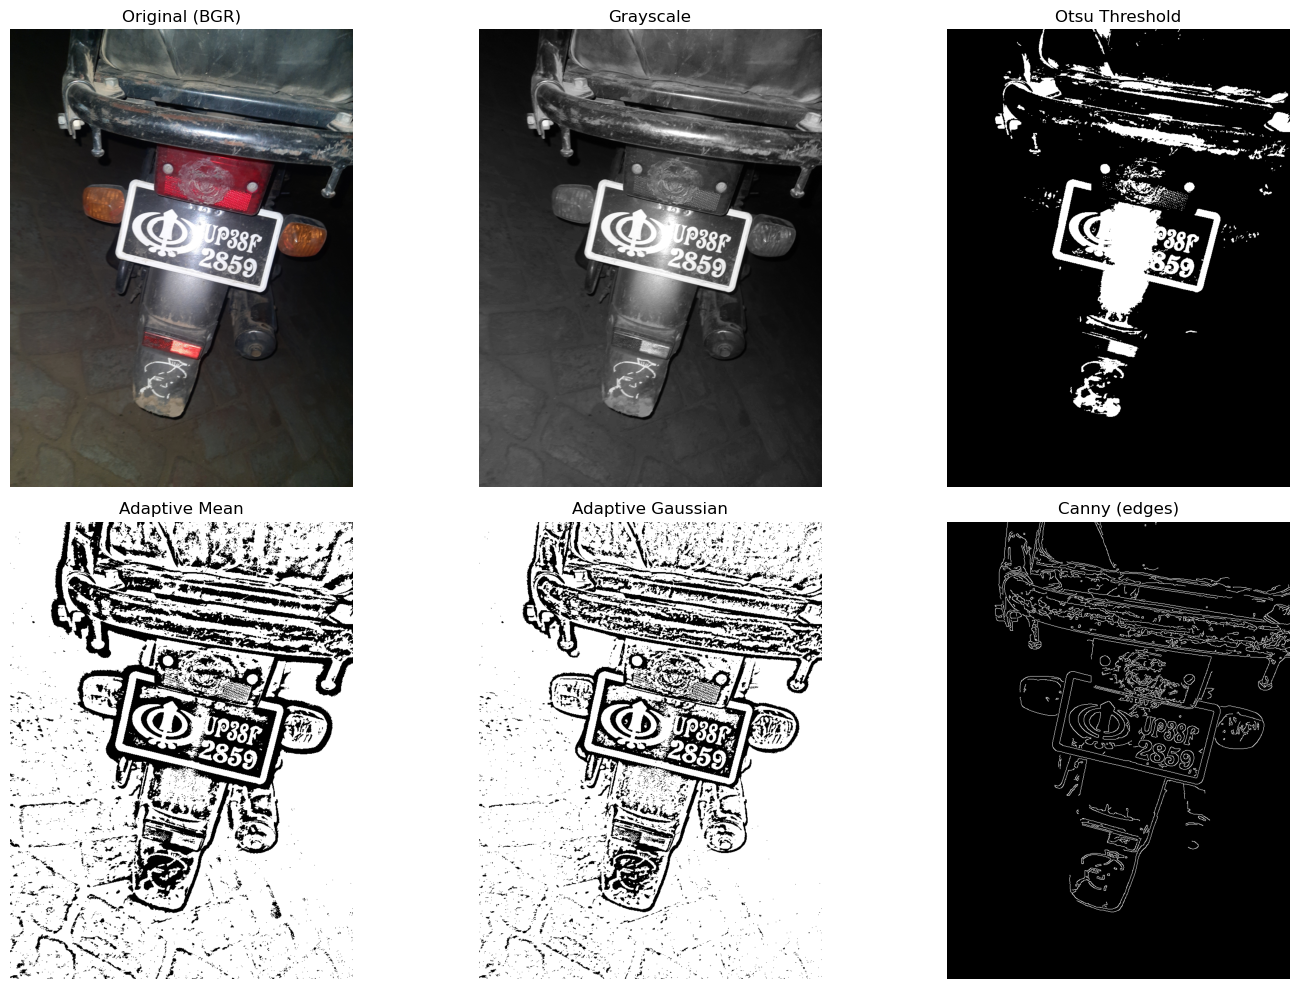

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMG_PATH = r"E:\Indian_Number_Plates\Sample_Images\Datacluster_number_plates (55).jpg"

def show_grid(titles, imgs, max_cols=3, figsize=(14,10)):
    n = len(imgs); cols = min(max_cols, n); rows = (n+cols-1)//cols
    plt.figure(figsize=figsize)
    for i,(t,img) in enumerate(zip(titles, imgs), 1):
        plt.subplot(rows, cols, i)
        if img.ndim == 3:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(img, cmap='gray')
        plt.title(t); plt.axis('off')
    plt.tight_layout(); plt.show()

bgr = cv2.imread(IMG_PATH)
if bgr is None: raise FileNotFoundError(IMG_PATH)
h,w = bgr.shape[:2]
scale = min(1.0, 720.0/min(h,w))
bgr = cv2.resize(bgr, (int(w*scale), int(h*scale)), interpolation=cv2.INTER_AREA)
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

# Global thresholding (Otsu)
_, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Adaptive thresholding (mean + gaussian)
adp_mean = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY, 31, 5)
adp_gaus = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY, 31, 5)

# Edge-based segmentation: Canny → contours mask
blur = cv2.GaussianBlur(gray, (3,3), 0)
edges = cv2.Canny(blur, 50, 150)
# Optional: fill closed edges (dilate+close then find largest)
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
edges_closed = cv2.morphologyEx(cv2.dilate(edges, k, 1), cv2.MORPH_CLOSE, k, iterations=1)

show_grid(
    ["Original (BGR)", "Grayscale", "Otsu Threshold",
     "Adaptive Mean", "Adaptive Gaussian", "Canny (edges)"],
    [bgr, gray, otsu, adp_mean, adp_gaus, edges],
    max_cols=3, figsize=(15,10)
)
